# WeatherPy
---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#  Output File (CSV)
output_data_file = "output_data/cities.csv"


In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


### OpenWeatherMap API Call

   * Weather check on each city using a API calls.
   * Printing log of citywise weather record.

In [3]:
# Set the API base URL
# For temperature in Celcius user units=metric
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f'{url}appid={weather_api_key}&units={units}'

#list of city data
city_data= []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):  
    
    if(i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 0 
    # Create endpoint URL with each city     
    city_url = query_url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
        
    # Add 1 to the record count
    record_count += 1        

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        #append the city info into city data list
        city_data.append({"City":city,
                          "Lat":city_lat,
                          "Lng":city_lng,
                          "Max Temp":city_max_temp,
                          "Humidity":city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed":city_wind,
                          "Country": city_country,
                          "Date":city_date}) 
        
    # If an error is experienced, skip the city                
    except:
        print("City not found. Skipping....")
        
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mys shmidta
City not found. Skipping....
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | meulaboh
Processing Record 4 of Set 1 | airai
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | nusaybin
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | nelson bay
Processing Record 10 of Set 1 | houma
Processing Record 11 of Set 1 | hilo
Processing Record 12 of Set 1 | grindavik
Processing Record 13 of Set 1 | port hardy
Processing Record 14 of Set 1 | palmer
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | new norfolk
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | lorengau
Processing Record 19 of Set 1 | morondava
Processing Record 20 of Set 1 | nizhneyansk
City not found. Skipping....
Processing Record 21 of Set 1 | galveston
Processing Record 22 of Set 1 |

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#Show Record Count
city_data_df.count()


City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,18.60,86,18,5.91,AU,1675699629
1,meulaboh,4.1363,96.1285,23.79,91,100,2.69,ID,1675699630
2,airai,-8.9266,125.4092,15.72,94,100,1.02,TL,1675699631
3,kaitangata,-46.2817,169.8464,11.53,82,3,2.49,NZ,1675699631
4,vaini,-21.2000,-175.2000,22.09,100,20,0.00,TO,1675699632


In [6]:
#Export the city data into a .csv.
city_data_df.to_csv("output_data/cities.csv", index_label='City_ID')

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,18.60,86,18,5.91,AU,1675699629
1,meulaboh,4.1363,96.1285,23.79,91,100,2.69,ID,1675699630
2,airai,-8.9266,125.4092,15.72,94,100,1.02,TL,1675699631
3,kaitangata,-46.2817,169.8464,11.53,82,3,2.49,NZ,1675699631
4,vaini,-21.2000,-175.2000,22.09,100,20,0.00,TO,1675699632


## Scatter Plots 

### Latitude Vs. Temperature

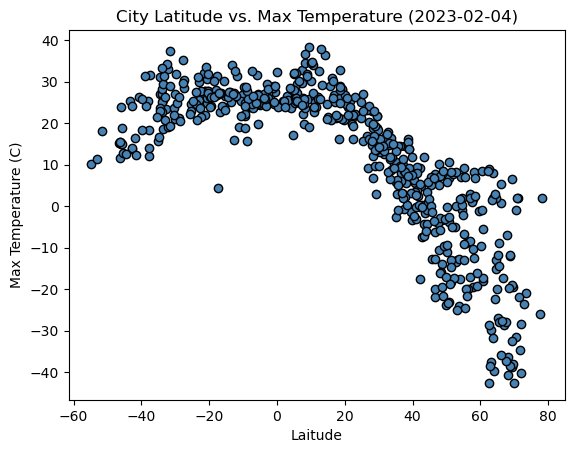

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (2023-02-04)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Images/Fig1.png")

# Show plot
plt.show()

### Latitude Vs. Humidity

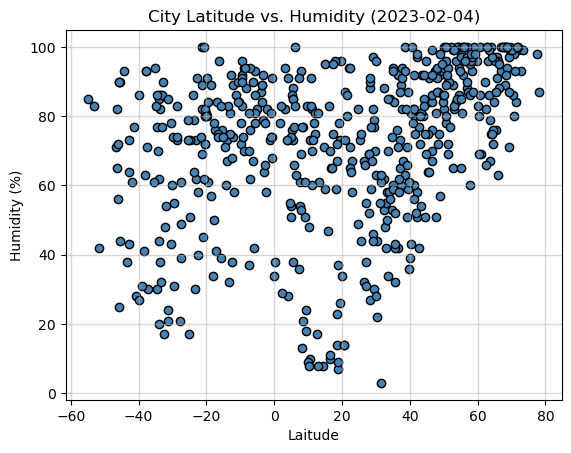

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (2023-02-04)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Images/Fig2.png")

# Show plot
plt.show()

### Latitude Vs. Cloudiness

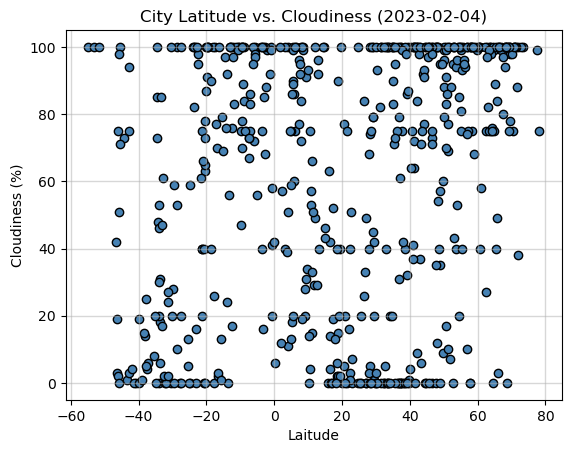

In [10]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (2023-02-04)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Images/Fig3.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

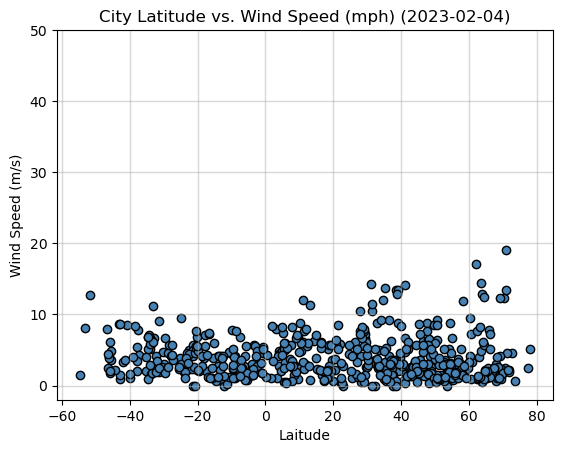

In [11]:
#Create Latitude vs. Wind Speed scatter plot
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (mph) (2023-02-04)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (m/s)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Images/Fig4.png")

# Show plot
plt.show()


## Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, text_coordinates):
    
    #run regressions on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))     
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values, 'r-')    
    plt.annotate(line_eq, text_coordinates, fontsize=12, color='red') 
    plt.xlabel("Latitude")   
    print(f'The r-value is: {rvalue**2}')
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,meulaboh,4.1363,96.1285,23.79,91,100,2.69,ID,1675699630
5,nusaybin,37.0778,41.2178,10.02,65,100,6.23,TR,1675699633
8,houma,29.5958,-90.7195,18.89,70,0,2.57,US,1675699634
9,hilo,19.7297,-155.0900,20.85,96,100,3.60,US,1675699353
10,grindavik,63.8424,-22.4338,1.97,75,75,12.86,IS,1675699635


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,-33.6500,115.3333,18.60,86,18,5.91,AU,1675699629
2,airai,-8.9266,125.4092,15.72,94,100,1.02,TL,1675699631
3,kaitangata,-46.2817,169.8464,11.53,82,3,2.49,NZ,1675699631
4,vaini,-21.2000,-175.2000,22.09,100,20,0.00,TO,1675699632
6,hermanus,-34.4187,19.2345,27.11,70,48,7.16,ZA,1675699633


###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7461131115677967


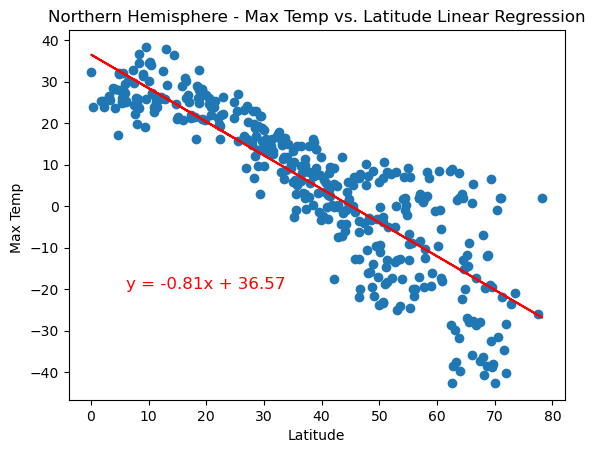

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values, y_values, (6, -20))

#set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Max Temp ")

plt.savefig("output_data/Images/Fig5.png")

plt.show()



 There is a strong negative correlation between latitude and max temperature for northern hemisphere.

The r-value is: 0.17452773129110766


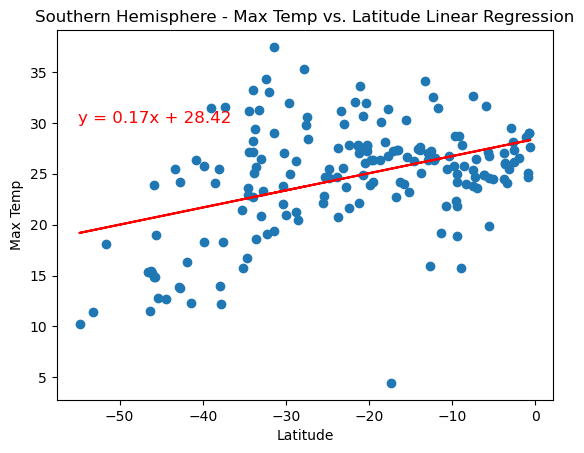

In [17]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values, y_values, (-55,30))

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Max Temp")

plt.savefig("output_data/Images/Fig6.png")

plt.show()


There is a weak positive correlation between latitude and max temperature for southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2681118153052088


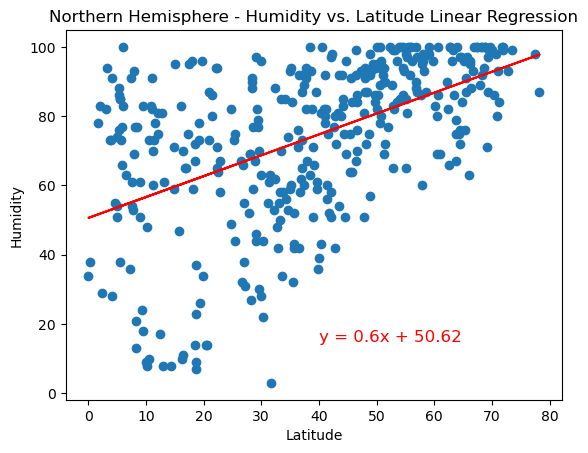

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linear_regression(x_values, y_values, (40,15))

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Humidity")

plt.savefig("output_data/Images/Fig7.png")

plt.show()


There is a moderate positive correlation between latitude and humidity for northern hemisphere.

The r-value is: 0.07736761312032986


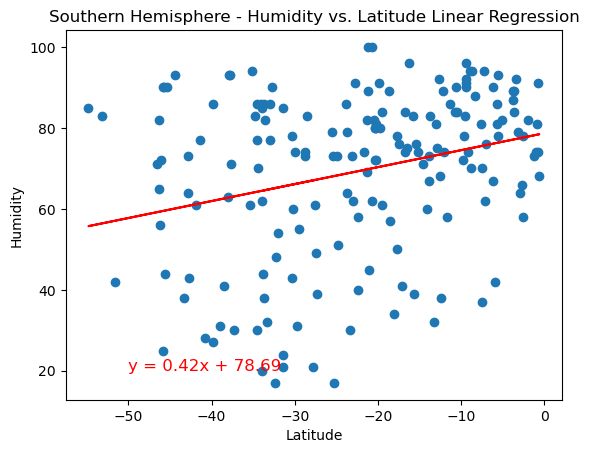

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values, (-50,20))

# Set title
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Humidity")

plt.savefig("output_data/Images/Fig8.png")

plt.show()


There is a moderate positive correlation between latitude and humidity for southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10244489856746593


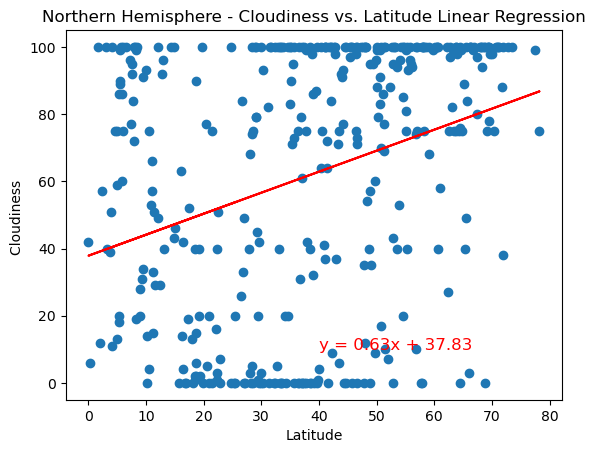

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regression(x_values, y_values, (40,10))

# Set a title
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Cloudiness ")

plt.savefig("output_data/Images/Fig9.png")

plt.show()


The r-value is: 0.17457487826532345


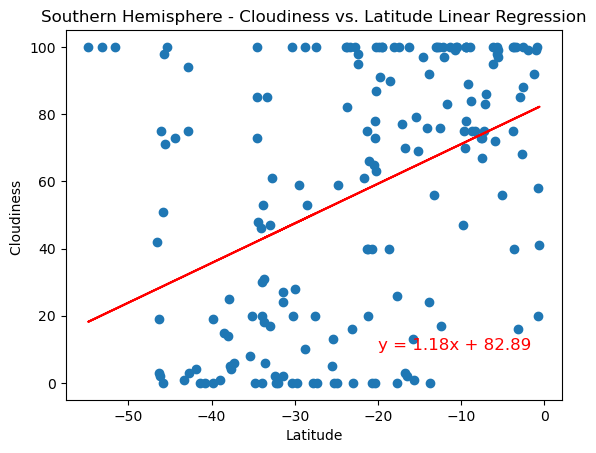

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values, (-20,10))

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Cloudiness ")

plt.savefig("output_data/Images/Fig10.png")

plt.show()

There is a weak positive correlation between latitude and cloudiness for both northern and southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0009858854040928964


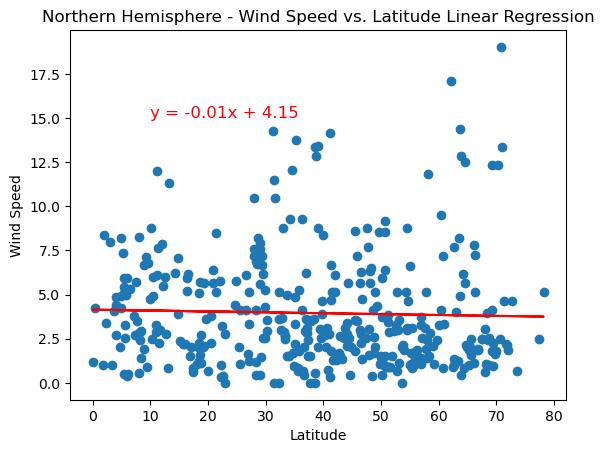

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regression(x_values, y_values, (10,15))


plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Wind Speed")

plt.savefig("output_data/Images/Fig11.png")

plt.show()

The r-value is: 0.07447587262094538


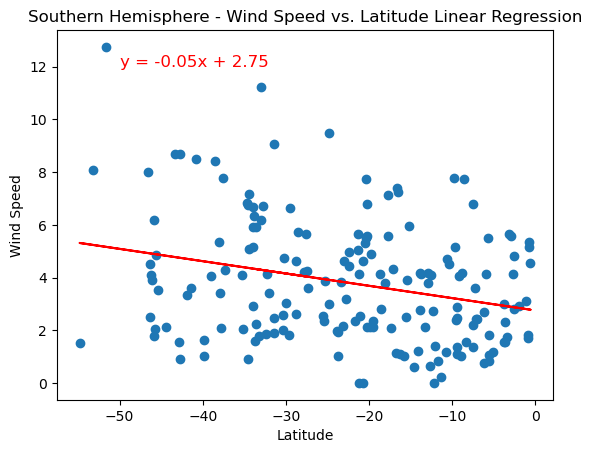

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regression(x_values, y_values, (-50,12))

plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set ylabel
plt.ylabel("Wind Speed")

plt.savefig("output_data/Images/Fig12.png")

plt.show()


 Zero correlation between latitude and windspeed for northern hemisphere and negetive for southern hemisphere.